In [1]:
# Import the Data
import pandas as pd
import numpy as np
import plotly 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn import linear_model
from sklearn.model_selection import train_test_split

plt.style.use("ggplot")

a = pd.read_csv("State_covid.csv")
b = pd.read_csv("COVID-19 Survey Student Responses.csv")

In [2]:
b.rename(
    columns = {
        'Region of residence': 'region',
        'Age of Subject': 'age',
        'Time spent on Online Class': 'time_online_class',
        'Rating of Online Class experience': 'rating_online_class',
        'Medium for online class': 'medium',
        'Time spent on self study': 'time_self_study',
        'Time spent on fitness': 'time_fitness',
        'Time spent on sleep': 'time_sleep',
        'Time spent on social media': 'time_social_media',
        'Prefered social media platform': 'prefered_social_media',
        'Time spent on TV': 'time_tv',
        'Number of meals per day': 'num_meals_per_day',
        'Change in your weight': 'delta_weight',
        'Health issue during lockdown': 'health_issue_in_lockdown',
        'Stress busters': 'stress_busters',       
        'Time utilized': 'time_utilized',
        'Do you find yourself more connected with your family, close friends , relatives  ?': 'more_family_connected',
        'What you miss the most': 'miss_most'}, inplace = True)

b.head()

,age,time_online_class,rating_online_class,medium,time_self_study,time_fitness,time_sleep,time_social_media,prefered_social_media,time_tv,num_meals_per_day,delta_weight,covid,stress_busters,time_utilized,more_family_connected,miss_most
0,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [3]:
print(b['rating_online_class'].unique())

['Good' 'Excellent' 'Very poor' 'Average' nan 'Poor']


In [4]:
print(b['medium'].unique())

['Laptop/Desktop' 'Smartphone' 'Tablet' nan 'Any Gadget'
 'Smartphone or Laptop/Desktop']


In [5]:
b[['rating_online_class', 'medium']].isnull().sum()

rating_online_class    24
medium                 51
dtype: int64

In [6]:
b['prefered_social_media'].unique()

array(['Linkedin', 'Youtube', 'Instagram', 'Whatsapp', 'None', 'Reddit',
       'Snapchat', 'Omegle', 'Twitter', 'Telegram', 'Facebook', 'Elyment',
       'None ', 'Quora', 'Talklife', 'WhatsApp'], dtype=object)

In [7]:
b['prefered_social_media'].value_counts()

Instagram    352
Whatsapp     336
Youtube      314
Linkedin      61
Facebook      52
Twitter       28
None          17
Snapchat       8
Reddit         5
Telegram       3
Omegle         1
Elyment        1
None           1
Quora          1
Talklife       1
WhatsApp       1
Name: prefered_social_media, dtype: int64

In [8]:
b['prefered_social_media'].replace('None ', 'None', inplace = True)
b['prefered_social_media'].replace('Whatsapp', 'WhatsApp', inplace = True)
b['prefered_social_media'].value_counts()

Instagram    352
WhatsApp     337
Youtube      314
Linkedin      61
Facebook      52
Twitter       28
None          18
Snapchat       8
Reddit         5
Telegram       3
Omegle         1
Elyment        1
Quora          1
Talklife       1
Name: prefered_social_media, dtype: int64

In [9]:
b['time_tv'].unique()

array(['1', '0', '3', '0.5', 'n', '2', '4.5', '1.5', 'N', '4', '0.3', '5',
       'No tv', '0.1', '0.25', '6', '0.6', '7', '8', '15', ' ', '0.75',
       '2.5', '3.5', '0.4'], dtype=object)

In [10]:
b['time_tv'].replace({'n':'0', 'N':'0', 'No tv':'0', ' ':'0', 0:'0'}, inplace = True)
b['time_tv'] = b['time_tv'].astype('float', copy = True)

In [11]:
b['stress_busters'].unique()

array(['Cooking', 'Scrolling through social media', 'Listening to music',
       'Watching web series', 'Social Media',
       'Coding and studying for exams', 'Online surfing',
       'live stream watching', 'Reading', 'Online gaming',
       'Reading books', 'Dancing', 'Talking with friends ',
       'Talking to your relatives',
       'sketching,reading books,meditation,songs',
       'Watching orgasm releasing videos', 'Sleep', 'Crying',
       'Many of these', 'Web Series', 'drawing ', 'Meditation', 'Cricket',
       'Anime Manga', 'Sleeping', 'Sketching and writing', 'Writing',
       'pubg', 'Talking', 'Workout ', 'Whatever want', 'Indoor Games',
       'watching movies,reading books,games,listening to music,sleep,dancing',
       'gardening cartoon',
       'listening to music,reading books and dancing.',
       'Dont get distreessed',
       ' listening music, motion design, graphic design, sleeping.',
       'Business', 'Many among these ', 'Talk with childhood friends.',
   

In [12]:
b['stress_busters'].replace([
    ['Sleep'],
    ['Scrolling through social media'],
    ['Reading books'],
    ['Talking to your relatives']
], ['Sleeping', 'Social Media', 'Reading', 'Talking'], inplace = True)

In [13]:
b['stress_busters'].replace([
    'Exercising','Exercise','Gym','Workout ','Cardio',
    'workout','working out and some physical activity'
],'Exercise/Gym', inplace = True)

In [14]:
b['stress_busters'].replace([
    'Talking with friends ','Talking','Talking to friends','With a friend',
    'Calling friends','Taking with parents','Talk with childhood friends.',
], 'Talking', inplace = True)

In [15]:
b['stress_busters'].replace([
    'Listening to music',' listening music, motion design, graphic design, sleeping.',
    'singing','Workout and listening music',
    'Both listining music and scrolling down social media',
    'Listening to music and reading books both . ',
    'Poetry, writing books and novels , listening to music too'
], 'Music', inplace = True)

In [16]:
b['stress_busters'].replace([
    'Online surfing','live stream watching','Watching orgasm releasing videos','Anime Manga',
    'Watching ted talks and music and books','Watching YouTube ','Internet',
    'Online gaming , surfing and listening to music ','Web Series','Watching web series',
    'Netflix, Friends and Books','Youtube'
], 'Internet Surfing', inplace=True)

In [17]:
b['stress_busters'].replace([
    'Coding and studying for exams',
    'sketching,reading books,meditation,songs',
    'Many of these',
    'All reading books watching web series listening to music and talking to friends',
    'Many among these ',
    'Do some home related stuff',
    'watching movies,reading books,games,listening to music,sleep,dancing',
    'Reading books, music, exercise',
    'Whatever want','listening to music,reading books and dancing.',
], 'Many Things', inplace=True)

In [18]:
b['stress_busters'].replace([
    'Reading','drawing','Dancing','Meditation','Driving','Drawing, painting','Forming ','Painting','Sketching',
    'Sports','Painting ','Drawing','Football','Business','Running','I run','Drawing and painting and sketching',
    'I play Rubiks cube','Indoor Games','I cant de-stress myslef','Writing my own Comics & novels',
    'I have no problem of stress ','Sketching and writing','By engaging in my work.', 'Work',
    'Painting,. Sewing','Crying','Dont get distreessed','gardening cartoon','Playing ','no stress',
    'Cricket','No able to reduce the stress ','drawing ','Writing'
], 'Doing Extra Activities', inplace=True)


In [19]:
b['stress_busters'].replace([
    'Sleeping, Online games',
    'pubg'
], 'Online gaming', inplace=True)

In [20]:
print(b['stress_busters'].unique())

['Cooking' 'Social Media' 'Music' 'Internet Surfing' 'Many Things'
 'Doing Extra Activities' 'Online gaming' 'Talking' 'Sleeping'
 'Exercise/Gym']


In [21]:
print(b['stress_busters'].value_counts())

Music                     282
Doing Extra Activities    209
Internet Surfing          183
Online gaming             177
Sleeping                  105
Social Media              100
Talking                    62
Cooking                    41
Exercise/Gym               13
Many Things                10
Name: stress_busters, dtype: int64


In [22]:
b['miss_most'].unique()

array(['School/college', 'Roaming around freely', 'Travelling',
       'Friends , relatives', 'Eating outside', 'Colleagues', 'Job',
       'Nothing this is my usual life', 'Gym', 'All of them',
       'Friends and School', 'Friends,Romaing and traveling',
       'Only friends', 'Taking kids to park', 'All of the above ',
       'All the above', 'Internet', 'Going to the movies', 'Nothing',
       'school, relatives and friends', 'All ', 'All', 'all of the above',
       'Nothing ', 'Eating outside and friends.', 'All above',
       'Nah, this is my usual lifestyle anyway, just being lazy....',
       'Family ', 'Football', 'Normal life',
       'The idea of being around fun loving people but this time has certainly made us all to reconnect (and fill the gap if any) with our families and relatives so it is fun but certainly we do miss hanging out with friends',
       'My normal routine', 'ALL', 'NOTHING', 'Being social ',
       'Previous mistakes', 'all', 'nothing', 'Playing', '.',
 

In [23]:
b['miss_most'].replace(
    [
        'All the above',
        'All of the above ',
        'everything',
        'All above',
        'all of the above',
        'ALL','all',
        'All of the above',
        'all of them',
        'All of them',
        'All '
    ],
    'All', inplace=True)

In [24]:
b['miss_most'].replace(
    [
        'NOTHING',
        'Nothing this is my usual life',
        'To stay alone. ',
        'Nothing ',
        'Nah, this is my usual lifestyle anyway, just being lazy....',
        'Normal life',
        'My normal routine',
        'nothing',
        'Job',
        'I have missed nothing',
        'Previous mistakes',
        '.',
        'I have missed nothing ',
        'Internet'
    ],
    'Nothing', inplace=True)

In [25]:
b['miss_most'].replace(
    [
        'Only friends',
        'Friends , relatives',
        'relatives and friends',
        'Family ',
        'The idea of being around fun loving people but this time has certainly made us all to reconnect (and fill the gap if any) with our families and relatives so it is fun but certainly we do miss hanging out with friends',
        'Family',
        'Friends, relatives & travelling',
        'Travelling & Friends',
        'School and friends',
        'Friends and School',
        'Eating outside and friends.',
        'School and friends.',
        'school, relatives and friends',
        'School and my school friends'
    ],
    'Friends/Relatives/Family', inplace=True)

In [26]:
b['miss_most'].replace(
    [
        'Playing',
        'Roaming around freely',
        'Taking kids to park',
        'Being social ',
        'Friends and roaming around freely',
        'Friends,Romaing and traveling',
        'Metro',
        'Going to the movies',
        'Gym',
        'Football',
        'Badminton in court'
    ],
    'Passing Time Outside', inplace=True)

In [27]:
b['miss_most'].unique()

array(['School/college', 'Passing Time Outside', 'Travelling',
       'Friends/Relatives/Family', 'Eating outside', 'Colleagues',
       'Nothing', 'All'], dtype=object)

In [28]:
b['miss_most'].value_counts()

School/college              379
Friends/Relatives/Family    235
Travelling                  183
Passing Time Outside        162
Eating outside              104
Colleagues                   67
Nothing                      26
All                          26
Name: miss_most, dtype: int64

In [29]:
b.head()

,age,time_online_class,rating_online_class,medium,time_self_study,time_fitness,time_sleep,time_social_media,prefered_social_media,time_tv,num_meals_per_day,delta_weight,covid,stress_busters,time_utilized,more_family_connected,miss_most
0,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1.0,4,Increased,NO,Cooking,YES,YES,School/college
1,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0.0,3,Decreased,NO,Social Media,YES,NO,Passing Time Outside
2,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0.0,3,Remain Constant,NO,Music,NO,YES,Travelling
3,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0.0,3,Decreased,NO,Internet Surfing,NO,NO,Friends/Relatives/Family
4,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1.0,4,Remain Constant,NO,Social Media,NO,NO,Travelling


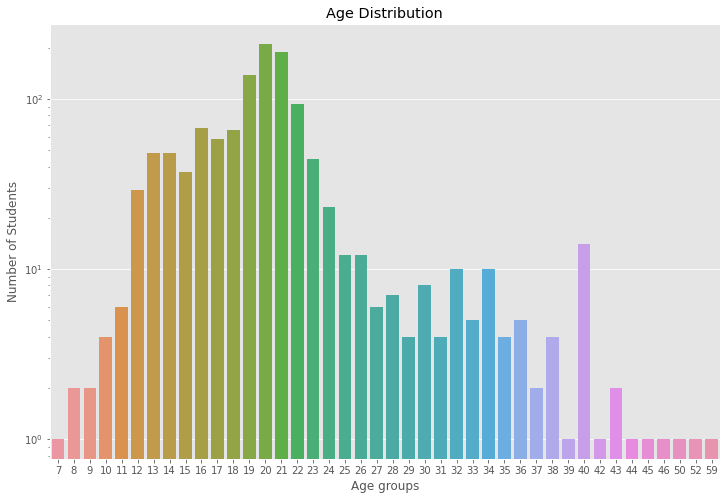

In [30]:
plt.figure(figsize=(12, 8))
sns.countplot(x='age', data=b)
plt.yscale('log')
plt.xlabel('Age groups')
plt.ylabel('Number of Students')
plt.title('Age Distribution')
plt.show()

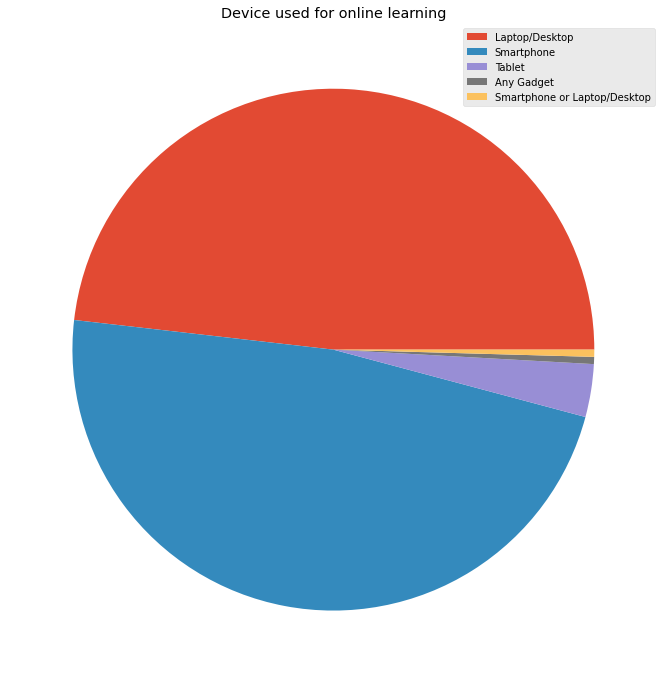

In [31]:
df = b['medium'].value_counts().to_dict()
plt.figure(figsize=(12,12))
plt.pie(x=df.values())
plt.legend(labels=df.keys(), loc='upper right')
plt.title('Device used for online learning')
plt.show()

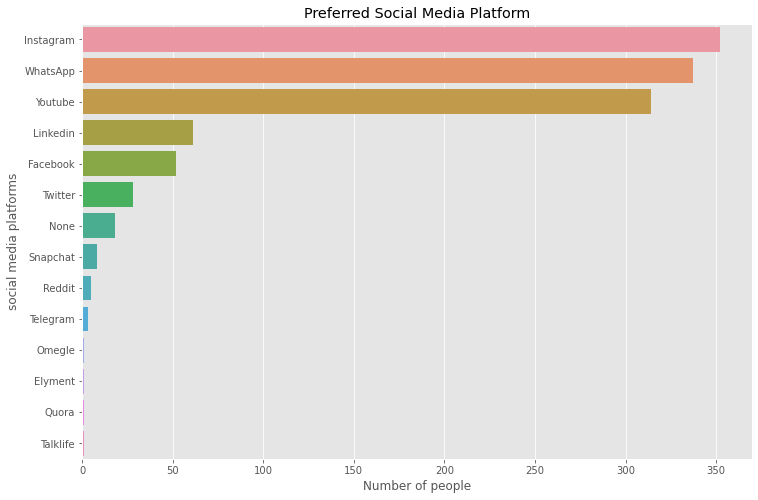

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(y='prefered_social_media', data=b, order=b['prefered_social_media'].value_counts().index[:15])
plt.xlabel("Number of people")
plt.ylabel("social media platforms")
plt.title("Preferred Social Media Platform")
plt.show()

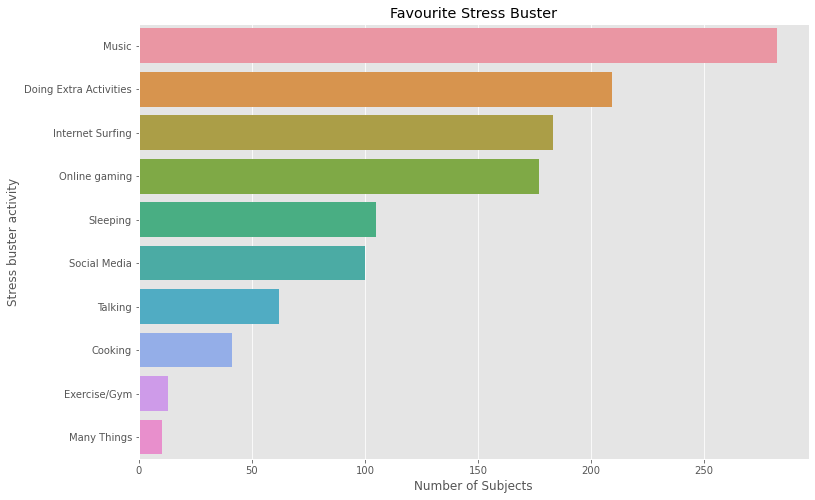

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(y='stress_busters', data=b, order=b['stress_busters'].value_counts().index[:15])
plt.xlabel("Number of Subjects")
plt.ylabel("Stress buster activity")
plt.title("Favourite Stress Buster")
plt.show()

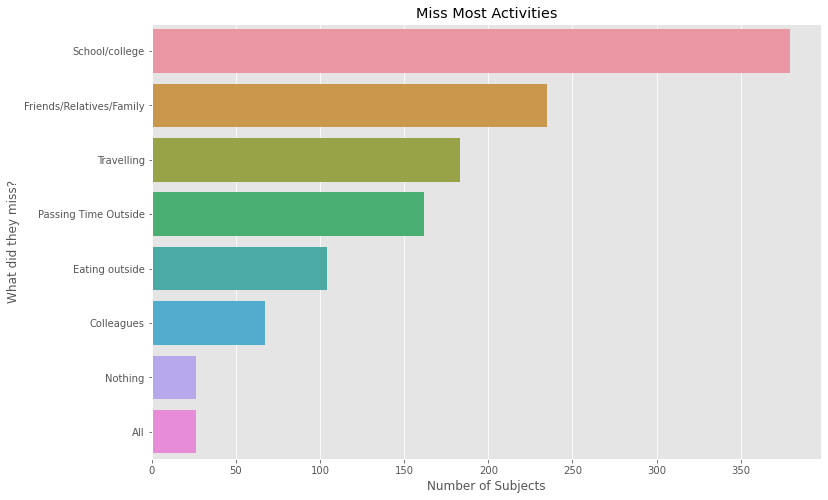

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(y='miss_most', data=b, order=b['miss_most'].value_counts().index[:10])
plt.xlabel("Number of Subjects")
plt.ylabel("What did they miss?")
plt.title("Miss Most Activities")
plt.show()

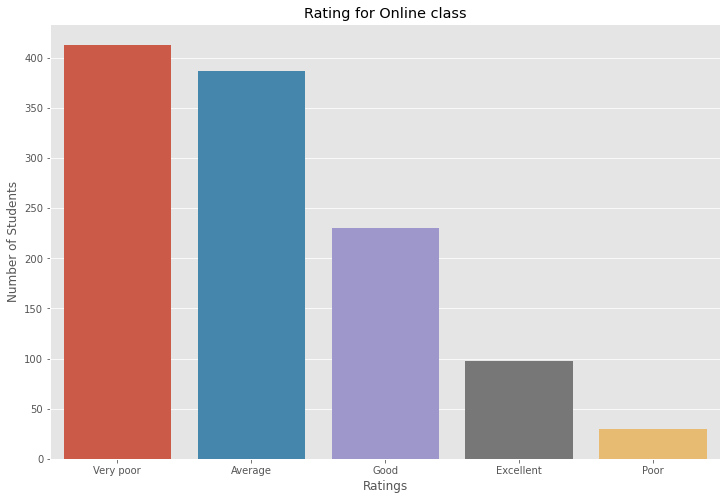

In [35]:
plt.figure(figsize=(12,8))
sns.countplot(x='rating_online_class', data=b, order=b['rating_online_class'].value_counts().index[:15])
plt.xlabel("Ratings")
plt.ylabel("Number of Students")
plt.title('Rating for Online class')
plt.show()